In [2]:
# Árvore de Decisão
# Instalação e carregamento do pacote tidymodels
install.packages('tidymodels')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘sparsevctrs’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tailor’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’




In [3]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.10     ✔ recipes      1.3.1 
✔ dials        1.4.2      ✔ rsample      1.3.1 
✔ dplyr        1.1.4      ✔ tailor       0.1.0 
✔ ggplot2      4.0.0      ✔ tidyr        1.3.1 
✔ infer        1.0.9      ✔ tune         2.0.0 
✔ modeldata    1.5.1      ✔ workflows    1.3.0 
✔ parsnip      1.3.3      ✔ workflowsets 1.1.1 
✔ purrr        1.1.0      ✔ yardstick    1.3.2 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



In [4]:
dados <- read.csv('automoveis_usados.csv')

In [5]:
head(dados)

,Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,SUV 4 portas,2005,275,6,28.96812,29695
2,seda,2016,170,4,61.15492,30495
3,minivan de passageiros,2016,248,6,45.06152,37650
4,seda,2015,138,4,57.93624,16170
5,seda,1991,162,4,32.18680,2000
6,picape cabine estendida,2012,152,4,37.01482,19299


In [6]:
# Separando os dados em treino e teste
set.seed(6578)

# Divide em 80% treino e 20% teste
df_split <- initial_split(dados, prop = 0.8)
df_split

<Training/Testing/Total>
<8655/2164/10819>

In [7]:
df_treino <- training(df_split)
df_teste <- testing(df_split)

In [8]:
# Definindo e treinando o modelo de árvore de decisão
arvore <- decision_tree() %>%
  set_engine('rpart') %>%     # motor 'rpart' para regressão
  set_mode('regression')      # modo regressão (previsão de valores numéricos)

In [9]:
set.seed(4556)

# Treinando a árvore com as variáveis Estilo, Ano e Potência do motor
modelo_arvore_decisao <- arvore %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

In [10]:
# Estrutura da árvore treinada
modelo_arvore_decisao

parsnip model object

n= 8655 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 8655 2.211151e+12 28564.100  
   2) Ano< 2000.5 1344 6.595049e+09  2526.276 *
   3) Ano>=2000.5 7311 1.125860e+12 33350.700  
     6) Potencia_motor< 216 3344 1.287282e+11 24209.120  
      12) Potencia_motor< 166.5 1392 2.697496e+10 19965.940 *
      13) Potencia_motor>=166.5 1952 5.881843e+10 27235.000 *
     7) Potencia_motor>=216 3967 4.821132e+11 41056.630  
      14) Potencia_motor< 310.5 2800 2.144520e+11 37429.220  
        28) Estilo=hatchback 2 portas,minivan de carga,minivan de passageiros,picape cabine dupla,picape cabine estendida,picape cabine simples,van de carga 677 1.777117e+10 32227.800 *
        29) Estilo=conversivel,cupe,hatchback 4 portas,perua,seda,SUV 2 portas,SUV 4 portas,SUV Conversível,van de passageiros 2123 1.725240e+11 39087.890 *
      15) Potencia_motor>=310.5 1167 1.424214e+11 49759.920  
        30) Estilo=cupe,perua,picape cabine dupla,picape cabine

In [11]:
# Visualizando a árvore

install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(rpart.plot)

Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




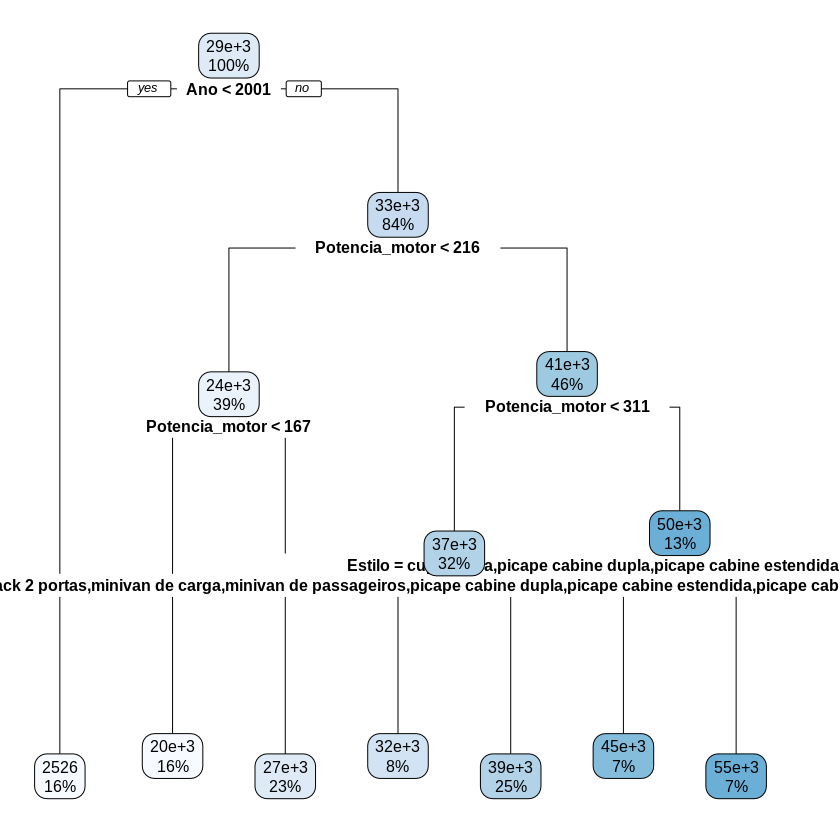

In [13]:
# Plota a árvore completa
arvore_plot <- rpart.plot(modelo_arvore_decisao$fit, roundint = FALSE, cex = 0.8)

In [14]:
# Árvore com profundidade máxima = 3 (mais simples, evita overfitting)
arvore_3 <- decision_tree(tree_depth = 3) %>%
  set_engine('rpart') %>%
  set_mode('regression')

In [15]:
set.seed(4556)

modelo_arvore_decisao_3 <- arvore %>%
  fit(Valor ~ Estilo + Ano + Potencia_motor, data = df_treino)

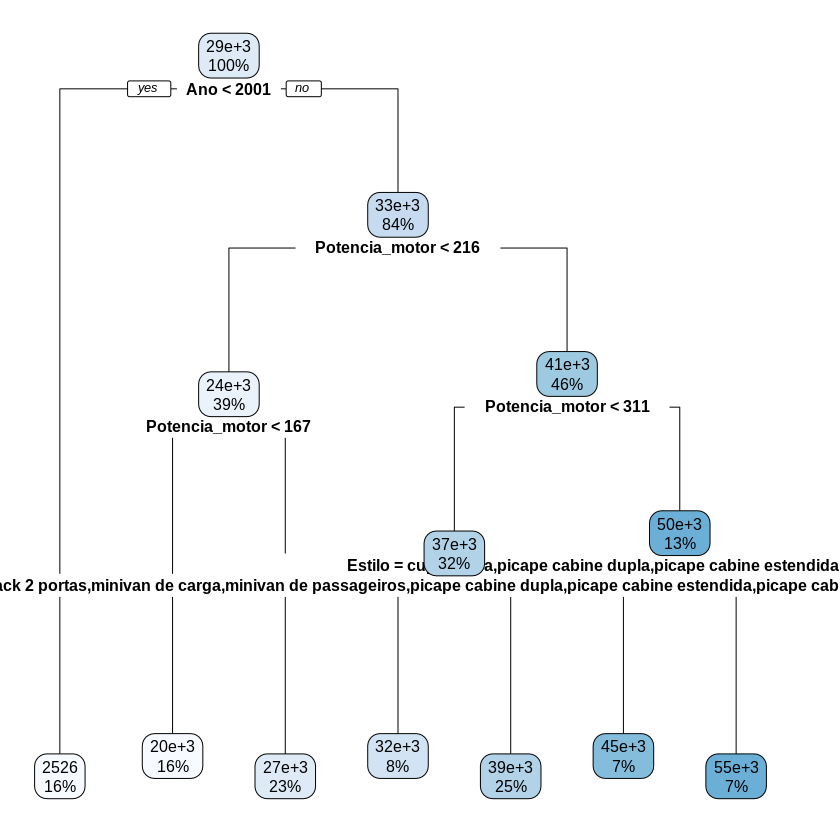

In [16]:
arvore_3_plot <- rpart.plot(modelo_arvore_decisao_3$fit, roundint = FALSE, cex = 0.8)

In [17]:
# Avaliando a performance do modelo

# Fazendo previsões no conjunto de teste
predicoes <- predict(modelo_arvore_decisao, new_data = df_teste)

In [18]:
predicoes

.pred
<dbl>
19965.935
39087.894
27234.996
2526.276
27234.996
39087.894
27234.996
19965.935
27234.996


In [20]:
# Juntando as previsões com os valores reais
predicoes_arvore <- bind_cols(df_teste, predicoes)

In [21]:
predicoes_arvore

Estilo,Ano,Potencia_motor,Cilindros_motor,Consumo_estrada_km,Valor,.pred
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
hatchback 2 portas,2015,106,4,59.54558,14845,19965.935
seda,2008,264,6,38.62416,25495,39087.894
hatchback 2 portas,2005,210,4,45.06152,23670,27234.996
perua,1991,162,4,32.18680,2000,2526.276
SUV 4 portas,2017,168,4,46.67086,23600,27234.996
SUV 4 portas,2017,284,6,43.45218,36100,39087.894
SUV 2 portas,2001,203,6,32.18680,21035,27234.996
hatchback 4 portas,2016,138,4,59.54558,17905,19965.935
hatchback 2 portas,2013,200,4,53.10822,31495,27234.996


In [22]:
# Métricas de desempenho R²
rsq(predicoes_arvore,
    estimate = .pred,
    truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.820248


In [24]:
# Métricas de desempenho Erro Absoluto Médio
mae(predicoes_arvore,
    estimate = .pred,
    truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
mae,standard,4783.037


In [25]:
# Métricas de desempenho Raiz do Erro Quadrático Médio
rmse(predicoes_arvore,
     estimate = .pred,
     truth = Valor)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6727.974


In [28]:
# Criando função para calcular métricas facilmente
calcular_metricas <- function(predicoes, valores_reais) {
  resultado <- tibble(
    predicao = predicoes,
    real = valores_reais
  )

  metricas <- resultado %>%
    metrics(truth = real, estimate = predicao)
  return(metricas)
}

In [29]:
metricas_arvore <- calcular_metricas(predicoes_arvore$.pred, df_teste$Valor)
metricas_arvore

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6727.974202
rsq,standard,0.820248
mae,standard,4783.037334


In [30]:
# Validação cruzada (5-fold)

# Avalia a performance do modelo em diferentes divisões dos dados,
# reduzindo a chance de overfitting e dando mais confiança nos resultados.
set.seed(4556)

df_folds <- vfold_cv(df_treino, v = 5)

In [31]:
set.seed(4456)

fits_cv <- fit_resamples(arvore,
                         Valor ~ Estilo + Ano + Potencia_motor,
                         resamples = df_folds,
                         metrics = metric_set(rmse, mae, rsq))

In [32]:
# Métricas por fold
metricas_cv <- collect_metrics(fits_cv, summarize = FALSE)
metricas_cv

id,.metric,.estimator,.estimate,.config
<chr>,<chr>,<chr>,<dbl>,<chr>
Fold1,rmse,standard,6666.1452563,pre0_mod0_post0
Fold1,mae,standard,4770.0714765,pre0_mod0_post0
Fold1,rsq,standard,0.8289911,pre0_mod0_post0
Fold2,rmse,standard,6857.5945569,pre0_mod0_post0
Fold2,mae,standard,4788.4718165,pre0_mod0_post0
Fold2,rsq,standard,0.8196698,pre0_mod0_post0
Fold3,rmse,standard,6773.7672352,pre0_mod0_post0
Fold3,mae,standard,4782.4624105,pre0_mod0_post0
Fold3,rsq,standard,0.8203407,pre0_mod0_post0


In [33]:
# Média das métricas nos 5 folds
media_metricas_arvore <- collect_metrics(fits_cv)
media_metricas_arvore

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
mae,standard,4783.4155430,5,21.731132630,pre0_mod0_post0
rmse,standard,6795.5869357,5,46.166763686,pre0_mod0_post0
rsq,standard,0.8190876,5,0.002977559,pre0_mod0_post0
